In [3]:
from tensorflow.keras.models import load_model
from collections import Counter
from joblib import load
from enum import Enum
from PIL import Image

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import json
import os

class Perfil(Enum):
    CONSERVADOR = 0
    MODERADO = 1
    AGRESSIVO = 2

def classify_poker_hand(cards):
    values = [card.split(' ')[0] for card in cards]
    suits = [card.split(' ')[-1] for card in cards]
    
    value_counts = Counter(values)
    suit_counts = Counter(suits)
    
    value_count_list = sorted(value_counts.values(), reverse=True)
    
    is_flush = len(suit_counts) == 1
    
    rank_map = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6,
                'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10,
                'jack': 11, 'queen': 12, 'king': 13, 'ace': 14}
    ranks = sorted([rank_map[value] for value in values])

    royal = True if ranks[0] == 10 and ranks[-1] == 14 else False
    is_straight = all(ranks[i] + 1 == ranks[i + 1] for i in range(len(ranks) - 1))

    if is_flush and is_straight and royal:
        return "Royal Flush"
    elif is_flush and is_straight:
        return "Straight Flush"
    elif value_count_list == [4, 1]:
        return "Four of a Kind"
    elif value_count_list == [3, 2]:
        return "Full House"
    elif is_flush:
        return "Flush"
    elif is_straight:
        return "Straight"
    elif value_count_list == [3, 1, 1]:
        return "Three of a Kind"
    elif value_count_list == [2, 2, 1]:
        return "Two Pair"
    elif value_count_list == [2, 1, 1, 1]:
        return "One Pair"
    else:
        return "High Card"

def handToInt(hand):
    if hand == "Royal Flush":
        return 10
    if hand == "Straight Flush":
        return 9
    if hand == "Four of a Kind":
        return 8
    if hand == "Full House":
        return 7
    if hand == "Flush":
        return 6
    if hand == "Straight":
        return 5
    if hand == "Three of a Kind":
        return 4
    if hand == "Two Pair":
        return 3
    if hand == "One Pair":
        return 2
    if hand == "High Card":
        return 1

def prepare(filepath):
    img = tf.keras.preprocessing.image.load_img(filepath, target_size=(224, 224), color_mode='grayscale')
    
    # Converter a imagem para um array de NumPy e expandir a dimensão para incluir o batch size
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Aumenta a dimensão para (1, 224, 224, 1)
    return img_array

def getPredictionClass(classes, prediction, predictions):
    predicted_class = classes[np.argmax(prediction)]

    if  predicted_class not in predictions:
        return predicted_class
    
    sorted_indices = np.argsort(prediction)[0]
    sorted_indices = sorted_indices[::-1]

    for idx in sorted_indices:
        predicted_class = classes[idx]
        if predicted_class not in predictions:
            return predicted_class
        
    return None

def getEntradas():
    perfil = -1
    while (True):
        perfil = input("Informe seu perfil de jogo:\n[0] - Conservador\n[1] - Moderado\n[2] - Agressivo\n--> ")

        if perfil.isdigit():
            perfil = int(perfil)

            if (perfil <= 2 and perfil >= 0):
                break

    aposta = -1
    while (True):
        aposta = input("Informe aposta necessária para continuar em dólar:(exemplo: 0.99)\n--> ")
        try:
            aposta = float(aposta.replace(',', '.'))
            break

        except:
            print("Valor inválido, por favor tente novamente.")

    jackpot = -1
    while (True):
        jackpot = input("Informe o valor do jackpot no momento, em dólar: (exemplo: 5.50)\n--> ")

        try:
            jackpot = float(jackpot.replace(',', '.'))
            break

        except:
            print("Valor inválido, por favor tente novamente.")

    jogadores_restantes = -1
    while (True):
        jogadores_restantes = input("Jogadores restantes:\n--> ")

        if jogadores_restantes.isdigit():
            jogadores_restantes = int(jogadores_restantes)

            if ( jogadores_restantes > 0):
                break

    desistentes = -1
    while (True):
        desistentes = input("Jogadores desistentes:\n--> ")

        if desistentes.isdigit():
            desistentes = int(desistentes)

            if (desistentes >= 0):
                break
    return perfil, aposta, jackpot, jogadores_restantes, desistentes


    
/$$$$$$$$           /$$                           /$$$$$$$                     
| $$__  $$         | $$                          | $$__  $$                    
| $$  \ $$ /$$$$$$ | $$   /$$  /$$$$$$   /$$$$$$ | $$  \ $$  /$$$$$$   /$$$$$$ 
| $$$$$$$//$$__  $$| $$  /$$/ /$$__  $$ /$$__  $$| $$$$$$$  /$$__  $$ /$$__  $$
| $$____/| $$  \ $$| $$$$$$/ | $$$$$$$$| $$  \__/| $$__  $$| $$  \__/| $$  \ $$
| $$     | $$  | $$| $$_  $$ | $$_____/| $$      | $$  \ $$| $$      | $$  | $$
| $$     |  $$$$$$/| $$ \  $$|  $$$$$$$| $$      | $$$$$$$/| $$      |  $$$$$$/
|__/      \______/ |__/  \__/ \_______/|__/      |_______/ |__/       \______/ 
                                                                                                                                                            

Adicione as imagens das cartas nas pastas "cartas/mao" e "cartas/mesa"
0 1.0 9.0 2 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
three of spades


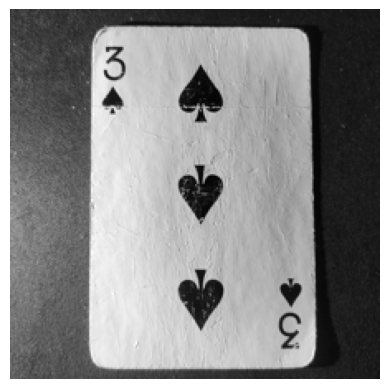

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
three of diamonds


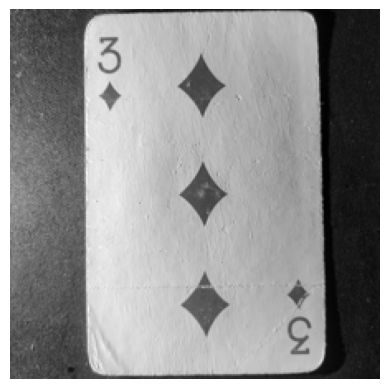

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
five of spades


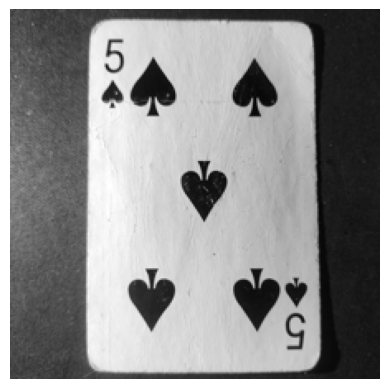

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
six of clubs


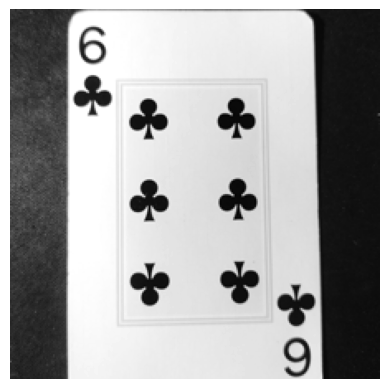

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
jack of clubs


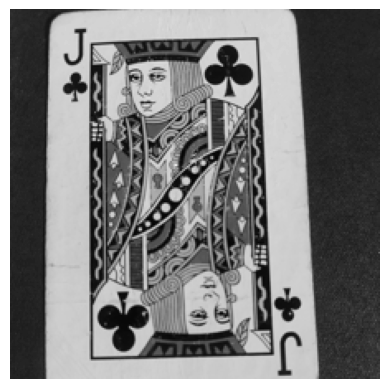

Você tem:  One Pair
Sugestão:  Desistir


In [5]:


print("""
    
/$$$$$$$$           /$$                           /$$$$$$$                     
| $$__  $$         | $$                          | $$__  $$                    
| $$  \\ $$ /$$$$$$ | $$   /$$  /$$$$$$   /$$$$$$ | $$  \\ $$  /$$$$$$   /$$$$$$ 
| $$$$$$$//$$__  $$| $$  /$$/ /$$__  $$ /$$__  $$| $$$$$$$  /$$__  $$ /$$__  $$
| $$____/| $$  \\ $$| $$$$$$/ | $$$$$$$$| $$  \\__/| $$__  $$| $$  \\__/| $$  \\ $$
| $$     | $$  | $$| $$_  $$ | $$_____/| $$      | $$  \\ $$| $$      | $$  | $$
| $$     |  $$$$$$/| $$ \\  $$|  $$$$$$$| $$      | $$$$$$$/| $$      |  $$$$$$/
|__/      \\______/ |__/  \\__/ \\_______/|__/      |_______/ |__/       \\______/ 
                                                                                                                                                            
""")
print("Adicione as imagens das cartas nas pastas \"cartas/mao\" e \"cartas/mesa\"")
input("Aperte ENTER para inciar...")

perfil, aposta, jackpot, jogadores_restantes, desistentes = getEntradas()
print(perfil, aposta, jackpot, jogadores_restantes, desistentes)

model = best_model = load_model("./modelos/best_custom_model73,25%.keras")

with open("classes.json", "r") as f:
    classes = json.load(f)

predictions = []

path = "./cartas/"
for i in os.listdir(path):
    for img in os.listdir(os.path.join(path, i)):
        img_path = f"{path}/{i}/{img}"
        
        prediction = best_model.predict(prepare(img_path))
        
        predicted_class = getPredictionClass(classes, prediction, predictions)
        predictions.append(predicted_class)
        print(predicted_class)

        img = Image.open(img_path)
        img_resized = img.resize((224, 224))
        img_gray = img_resized.convert('L') 
        plt.imshow(np.array(img_gray), cmap='gray')  
        plt.axis('off') 
        plt.show() 

handRank = classify_poker_hand(predictions)
handRankInt = handToInt(handRank)
print("Você tem: ", handRank)

rf_loaded = load("modelos/random_forest_model83%.joblib")

new_data = pd.DataFrame({
    "Score": [handRankInt],
    "Perfil": [perfil],
    "Aposta Necessaria": [aposta],
    "Jackpot": [jackpot],
    "Jogadores Restantes": [jogadores_restantes],
    "Desistentes": [desistentes]
})

prediction = rf_loaded.predict(new_data)
print("Sugestão: ", "Continuar" if prediction == 1 else "Desistir")